In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-20 20:31:20.928810: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 20:31:20.928909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 20:31:21.061825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h3>Import Dataset</h3>

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Investigate data set size and data type

print(f"Shape of train data set: {X_train_full.shape}")
print(f"Shape of test data set: {X_test.shape}")
print(f"Values in image varies between {np.min(X_train_full)} and {np.max(X_train_full)}")

Shape of train data set: (60000, 28, 28)
Shape of test data set: (10000, 28, 28)
Values in image varies between 0 and 255


In [4]:
# Split training into train and validation sets
# Validation set size is 5000 out of 60000 the full training set

num_validation = 5000
num_train = X_train_full.shape[0] - num_validation
X_valid, X_train = X_train_full[:num_validation]/255, X_train_full[num_validation:]/255
y_valid, y_train = y_train_full[:num_validation], y_train_full[num_validation:]

In [5]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

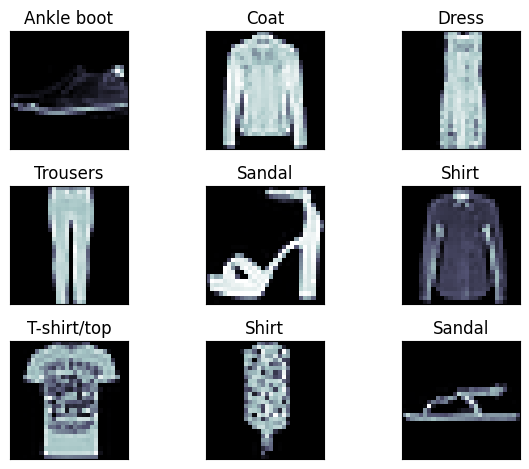

In [6]:
# Look at 9 random samples from the train data set

row_size = 3
col_size = 3
random_ids = np.random.choice(np.arange(num_train), size=row_size*col_size, replace=False)
fig, axes = plt.subplots(row_size, col_size)
for axis_1 in range(0, row_size):
    for axis_2 in range(0, col_size):
        random_id = random_ids[axis_1*col_size+axis_2]
        axes[axis_1, axis_2].imshow(X_train[random_id], cmap='bone')
        axes[axis_1, axis_2].set_title(class_names[y_train[random_id]])
        axes[axis_1, axis_2].set_xticks([])
        axes[axis_1, axis_2].set_yticks([])
        
plt.tight_layout()
plt.savefig('/kaggle/working/samples.png')
plt.show()
    

<h3>Create and Train model</h3>

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [9]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Create checkpoint callback
"""
checkpoint_path = "training_1/CP.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                             save_weights=True,
                                             verbose=1)
"""

# Create early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=6,
                                               restore_best_weights=True)

# Train model
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping])

Epoch 1/30
1719/1719 [==============================] - 266s 154ms/step - loss: 0.7933 - accuracy: 0.7119 - val_loss: 0.3963 - val_accuracy: 0.8564
Epoch 2/30
1719/1719 [==============================] - 263s 153ms/step - loss: 0.4398 - accuracy: 0.8498 - val_loss: 0.3118 - val_accuracy: 0.8842
Epoch 3/30
1719/1719 [==============================] - 262s 153ms/step - loss: 0.3720 - accuracy: 0.8715 - val_loss: 0.2761 - val_accuracy: 0.9024
Epoch 4/30
1719/1719 [==============================] - 263s 153ms/step - loss: 0.3354 - accuracy: 0.8849 - val_loss: 0.2654 - val_accuracy: 0.9054
Epoch 5/30
1719/1719 [==============================] - 263s 153ms/step - loss: 0.3066 - accuracy: 0.8939 - val_loss: 0.2735 - val_accuracy: 0.9042
Epoch 6/30
1719/1719 [==============================] - 263s 153ms/step - loss: 0.2862 - accuracy: 0.9022 - val_loss: 0.2615 - val_accuracy: 0.9064
Epoch 7/30
1719/1719 [==============================] - 264s 153ms/step - loss: 0.2693 - accuracy: 0.9071 - val_

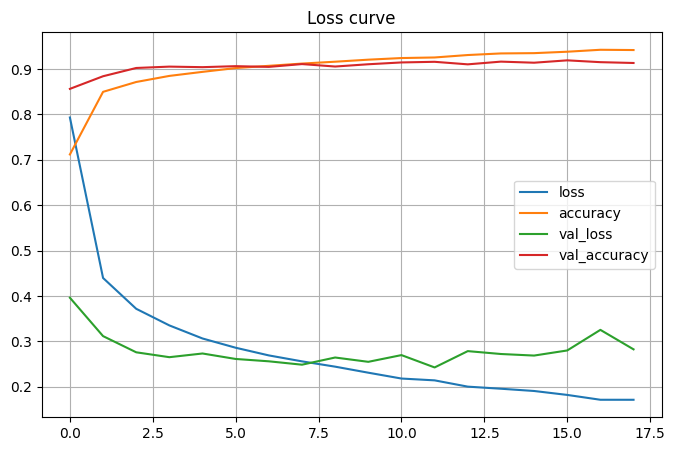

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Loss curve')
plt.savefig('/kaggle/working/loss.png')
plt.show()

In [11]:
# Save model
model_path = "/kaggle/working/conv_model.keras"
model.save(model_path)

In [12]:
# Load model
model_path = "/kaggle/working/conv_model.keras"
model = keras.saving.load_model(model_path)

<h3>Evaluate model</h3>

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 39ms/step - loss: 33.3574 - accuracy: 0.8612


[33.35741424560547, 0.8611999750137329]

In [14]:
# Get predicted labels
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 12s 39ms/step


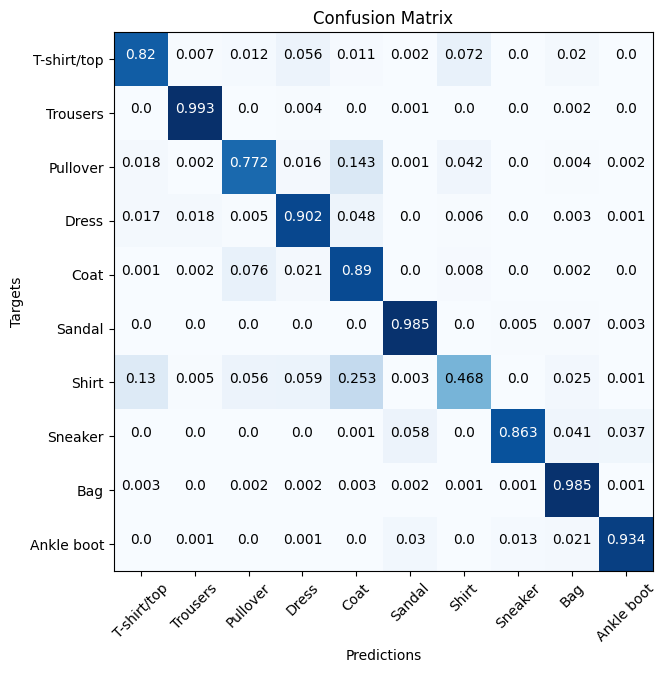

In [15]:
# Calculate confussion matrix
cm = metrics.confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matric
plt.figure(figsize=(7, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Fill matrix with numbers
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
            horizontalalignment='center',
            color="white" if cm[i, j] > thresh else 'black')
plt.title("Confusion Matrix")
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.savefig('/kaggle/working/confusion_matrix.png')
plt.show()

There are two classes that the model strugels to classify; pullovers and shirts. Pullovers tend to be falsly classified as coats, and shirts gets falsley calssified as T-shirts/tops or coats. Looking at some examples where these misstakes it is clear to see why this occures as they tend to look similar.

In [16]:
# Find wrong predictions
wrong_predictions = np.where(y_test != predictions)[0]

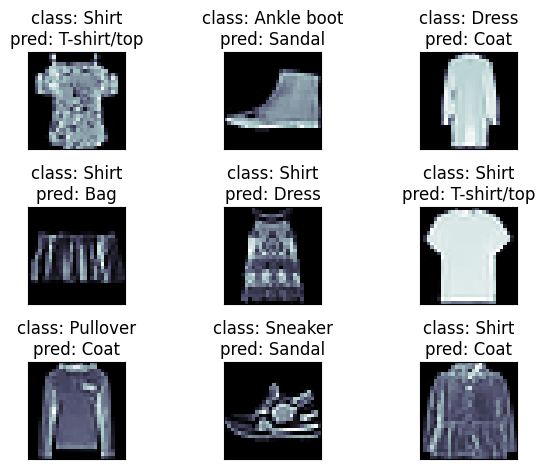

In [17]:
# Look at 9 random samples from the train data set

row_size = 3
col_size = 3
random_ids = np.random.choice(wrong_predictions, size=row_size*col_size, replace=False)
fig, axes = plt.subplots(row_size, col_size)
for axis_1 in range(0, row_size):
    for axis_2 in range(0, col_size):
        random_id = random_ids[axis_1*col_size+axis_2]
        axes[axis_1, axis_2].imshow(X_test[random_id], cmap='bone')
        axes[axis_1, axis_2].set_title(f"class: {class_names[y_test[random_id]]}\npred: {class_names[predictions[random_id]]}")
        axes[axis_1, axis_2].set_xticks([])
        axes[axis_1, axis_2].set_yticks([])
        
plt.tight_layout()
plt.savefig('/kaggle/working/wrongPredictions.png')
plt.show()
    